# Analizing fake bankotes

Here we want to analyize a dataset comprised of two attributes coming from a wavelet transformation of images of both real and fake banknotes. These attributes are the variation and the skweness

## Initial dataset analysis

In [32]:
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
import seaborn as sns

In [2]:
data = pd.read_csv('banknotes.csv')

In [3]:
data.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


In [4]:
correlation_matrix = data.corr()
print(correlation_matrix)

          V1        V2
V1  1.000000  0.264026
V2  0.264026  1.000000


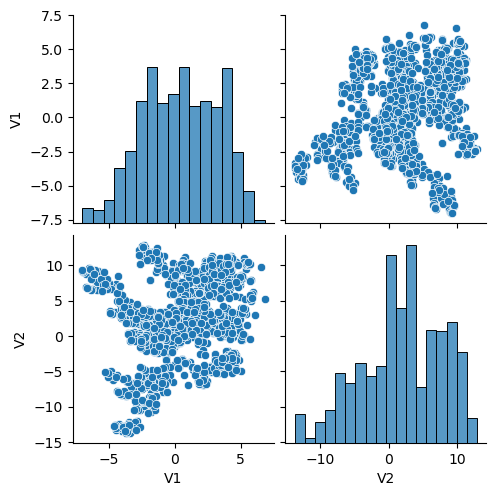

In [5]:
sns.pairplot(data)
plt.show()

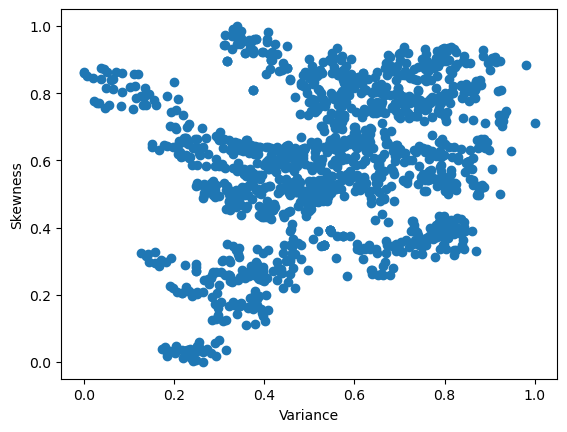

In [6]:
plt.scatter((data['V1']-data['V1'].min())/(data['V1'].max()-data['V1'].min()),
            (data['V2']-data['V2'].min())/(data['V2'].max()-data['V2'].min()))
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.show()

## Binary clustering

In [93]:
variance = data['V1']
skewness = data['V2']
dataset = np.column_stack((variance, skewness))

In [118]:
kmean_res = KMeans(n_clusters=2, n_init='auto', init='k-means++', max_iter=1000).fit(dataset)
clusters=kmean_res.cluster_centers_

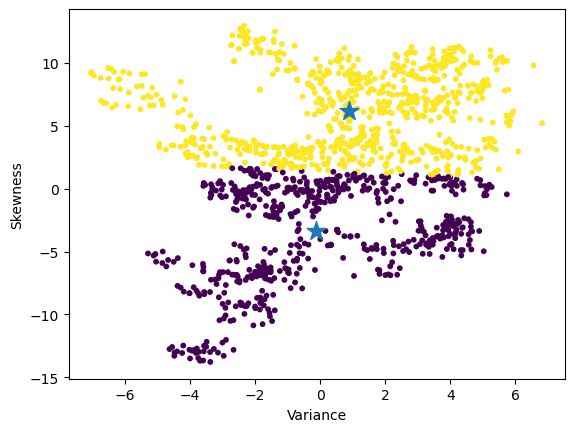

In [124]:
fig, graph = plt.subplots()

graph.scatter(variance, skewness, c=kmean_res.labels_.astype(float),s=10)
graph.scatter(clusters[:,0],clusters[:,1], s=200, marker='*')
    
graph.set(xlabel='Variance',ylabel='Skewness')
#fig.suptitle('Income inequality vs Average income')

plt.show()
fig.savefig('banknotes.png', dpi=600)

## Authentication

In [120]:
data_auth_arff = arff.loadarff('bank_auth.arff')

In [121]:
data_auth = pd.DataFrame(data_auth_arff[0])

In [122]:
from sklearn import metrics

In [123]:
metrics.accuracy_score(data_auth['Class'].replace(b'1',1).replace(b'2',0), kmean_res.labels_)

/var/folders/_b/ws1r29zn39n0fsh73lx6lg_00000gn/T/ipykernel_5430/1444947904.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metrics.accuracy_score(data_auth['Class'].replace(b'1',1).replace(b'2',0), kmean_res.labels_)


0.6508746355685131

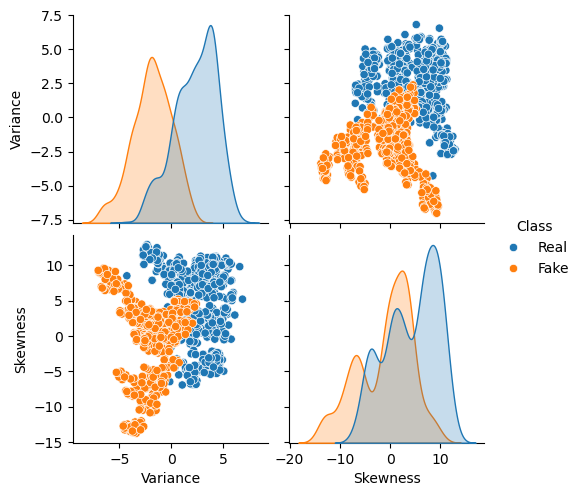

In [138]:
pairplot = sns.pairplot(data_auth[['V1','V2','Class']].replace(b'1','Real').replace(b'2','Fake'), hue='Class')
pairplot.x_vars = ['Variance','Skewness']
pairplot.y_vars = ['Variance','Skewness']
pairplot._add_axis_labels()
plt.savefig('Auth.png',dpi=600)